In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

names_latency=['time', 'latency', 'op2', 'size', 'op3']

## Zoned 200GB with bs=1M
### HM-LS : BW and Latency

In [5]:
df_hmls = pd.read_csv("lsdm/zoned/200GB/qd1/bs1MB/lat_log_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_hmls['cumulative_gb'] = df_hmls['size'].cumsum() / (1024**3)
df_hmls['time'] = df_hmls['time']/1000
df_hmls = df_hmls.sort_values(by=['time'])

### HM-Hybrid : BW and Latency (column F)

In [6]:
df_hmhybrid = pd.read_csv("dm-zoned/zoned/200GB/qd1/bs1MB/lat_log_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_hmhybrid['cumulative_gb'] = df_hmhybrid['size'].cumsum() / (1024**3)
df_hmhybrid['time'] = df_hmhybrid['time']/1000
df_hmhybrid = df_hmhybrid.sort_values(by=['time'])



### DM-Hybrid : Latency (Column G)

In [7]:
df_dmhybrid = pd.read_csv("STL/zoned/200GB/qd1/bs1M/lat_log_lat.1.log", sep=",", names=names_latency)

#process the bw data
df_dmhybrid['cumulative_gb'] = df_dmhybrid['size'].cumsum() / (1024**3)
df_dmhybrid['time'] = df_dmhybrid['time']/1000
df_dmhybrid = df_dmhybrid.sort_values(by=['time'])

<Figure size 640x480 with 0 Axes>

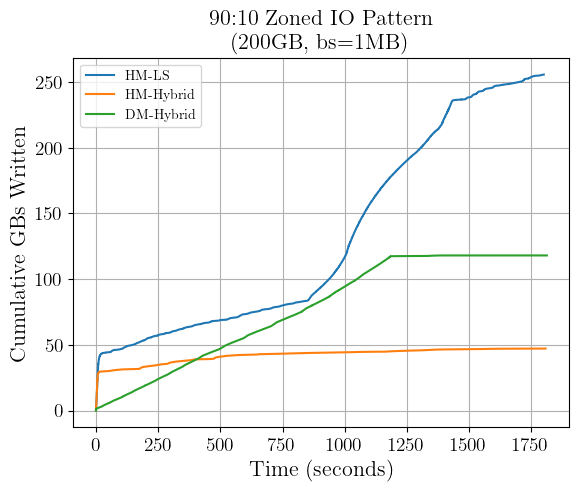

In [9]:
# Step 5: Create the plot
plt.figure(figsize=(8, 6), dpi=80)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots()

# Plot the data from the first DataFrame (df_hmls)
ax.plot(df_hmls['time'], df_hmls['cumulative_gb'], label='HM-LS')

# Plot the data from the second DataFrame (df_hmhybrid)
ax.plot(df_hmhybrid['time'], df_hmhybrid['cumulative_gb'], label='HM-Hybrid')

# Plot the data from the second DataFrame (df_dmhybrid)
ax.plot(df_dmhybrid['time'], df_dmhybrid['cumulative_gb'], label='DM-Hybrid')

# Customize the plot (add labels, legend, title, etc.)
ax.set_xlabel('Time (seconds)', fontsize=16)
plt.xticks(fontsize=14)
ax.set_ylabel('Cumulative GBs Written', fontsize=16)
plt.yticks(fontsize=14)
ax.set_title('90:10 Zoned IO Pattern\n(200GB, bs=1MB)', fontsize=16)
plt.grid(True)
ax.legend()
plt.savefig('fig/final/all_zoned_200gb_1Mb_90_10_gb-vs-time.pdf', bbox_inches='tight')